# CS 489 Music Genre Classification with Machine Learning

Nimun Bajwa

CS 489

20842018

April 8th, 2024

---




## Introduction

**Motivation**

Music genre classification is an important component of Music information retrieval (MIR) which has been receiving a lot of attention recently in both academic and recreational settings. Spotify has been a gamechanger in combining these two worlds. Even the layman now has an appreciation for the data-science work involved in identifying their favourite genres and musical styles, and recommending them new music.


Music genre classification is the foundation of modern music recommendation systems. It is a non-trivial task that is about attempting to bring some objectivity to a subjective and artistic space. It is the proof that data science is an inter-disciplinary field. It provides an organizational solution to the convoluted database management behind streaming services, where tens of thousands of songs are being released each month, needing to be labelled and classified.


As someone who is an avid music listener, I am also curious to see what makes certain genres different from each other. Using a statistical approach that analyzes audio features will be an informative and meaningful project for me.


**Related Work**

Music genres are human-made concepts, and as a result up until the turn of this century, music genre classification and annotation was primarily done manually [1]. Human accuracy at this task is presumed to be 70% [2].

That changed in 2002 when G.Tzanetakis and P.Cook  published "Musical Genre Classification of Audio Signals", a paper where they used Gaussian mixture model (GMM) and K-Nearest Neighbour (K-NN)classifers on various audio features, including Mel-frequency cepstral coefficients (MFCCs) and achieved a peak accuracy of 61% when classifying over ten musical genres using GMMs [1].

This paper marked the beginning of machine-learning techniques being used in the genre classification space. In 2003, C. Xu et al. used Support Vector Machines (SVMs) and features including MFCCs to classify over 4 musical genres with an accuracy of over 90% [3].

In recent years, Convolutional Neural Networks (CNNs) have been lauded for their effectiveness at image classification and recognition, and they are also increasingly being applied to music genre analysis. These CNNs use MFCCs and Mel-spectrograms, which are essentially images - to classify audio snippets into genres. They have shown up as the clear winner compared to other classifiers, with accuracy rates among the high 80s to low 90s amongst ten different genres ([4], [5], [6]). Due to its newfound appeal and its compelling results, my project will be focused on using CNNs for music genre analysis.


**My Plan**

I will first implement a Multi-layer Perceptron Neural Network because it will help introduce me to neural networks as a whole. It is considered the simpler, less effective predecessor of CNNs. I will then implement a Convolutional Neural Network (CNN). I would like to see how both approaches compare with regards to music genre classification.

The feature that I will use to train my models is Mel-frequency cepstral coefficients (MFCCs).

## Preprocessing Data

This project is about learning how to classify music according to genre.

For data, I will be using the [GZTAN dataset](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?resource=download) provided by Kaggle. This dataset contains 100 30-second samples for each of the following genres: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae and rock.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
%matplotlib inline
import librosa

### Loading GZTAN Data:

In [ ]:
# Path to the folder full of 30-second samples organized by genres
MUSIC_DATASET_PATH =
'/content/drive/MyDrive/CS 489/CS489 Final Project/Data/genres_original'

# Path to Json file to save mfcc data
JSON_PATH = '/content/drive/MyDrive/CS 489/CS489 Final Project/data_10.json'

# Path to the file containing feature values for our samples
features_path = pd.read_csv(
    '/content/drive/MyDrive/CS 489/CS489 Final Project/Data/features_30_sec.csv'
    )

# Showing structure of feature file:
features_path.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Showing MFCCs

The MFCC's (mfcc_segments) will be our inputs, and the genre classification (labels) will be our outputs.

Let's investigate what they look like for the different genres:

In [ ]:
# Function to load and display MFCCs for a song
def display_mfcc(ax, song, sr, title):
    mfcc_song = librosa.feature.mfcc(y=song, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfcc_song, x_axis="time", sr=sr, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('MFCC')

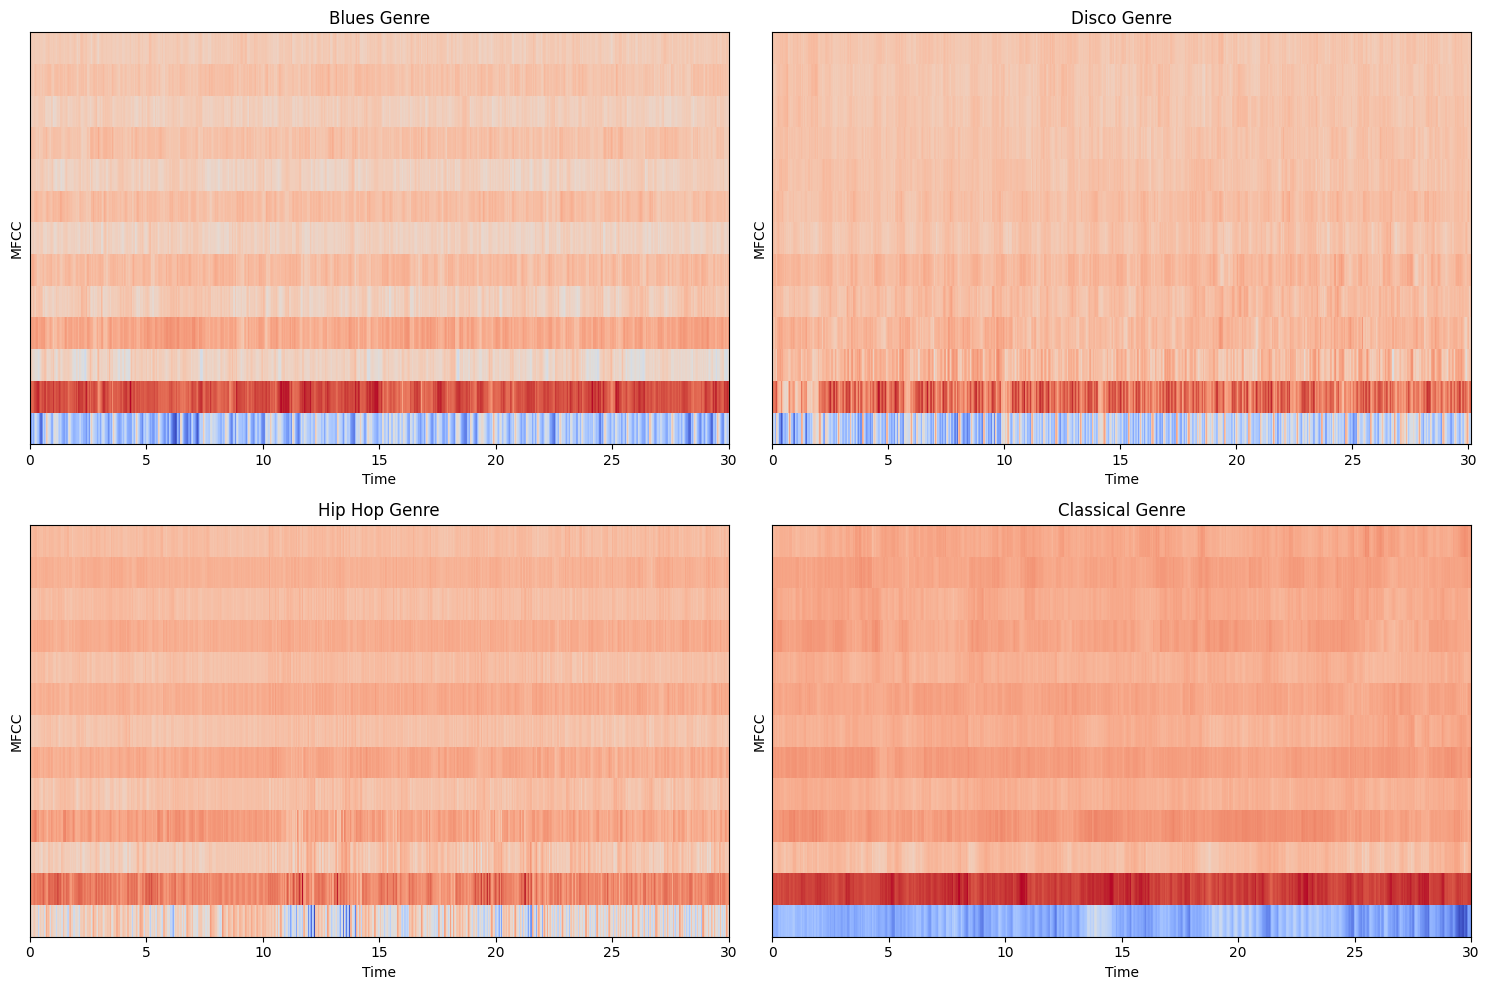

In [ ]:
# Loading songs for each genre
blues_song, blues_sr = librosa.load(MUSIC_DATASET_PATH +
                                    '/blues/blues.00000.wav')
disco_song, disco_sr = librosa.load(MUSIC_DATASET_PATH +
                                    '/disco/disco.00000.wav')
hiphop_song, hiphop_sr = librosa.load(MUSIC_DATASET_PATH +
                                      '/hiphop/hiphop.00000.wav')
classical_song, classical_sr = librosa.load(MUSIC_DATASET_PATH +
                                            '/classical/classical.00000.wav')

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Display MFCCs for each genre in the grid
display_mfcc(axs[0, 0], blues_song, blues_sr, 'Blues Genre')
display_mfcc(axs[0, 1], disco_song, disco_sr, 'Disco Genre')
display_mfcc(axs[1, 0], hiphop_song, hiphop_sr, 'Hip Hop Genre')
display_mfcc(axs[1, 1], classical_song, classical_sr, 'Classical Genre')

plt.tight_layout()
plt.show()


### Extracting MFCC

MFCC data will be our inputs for our ML model. The genre labels will be our output targets. This function extracts both and stores them in a json for further use.

In [ ]:
import math
import json

SAMPLE_RATE = 22050
DURATION = 30 #seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

In [ ]:
# num_segments = Number of segments from 30 second segment (to have more data)
# n_fft = number of sampling points
# n_mfcc
def extract_mfcc(dataset_path, json_path, n_mfcc=12, n_fft=2048, hop_length=512,
                 num_segments=5):

  # Storing data
  data = {
      "genre_mapping": [], # e.g. blues is index 0
      "mfcc": [], # mfcc's for each segment
      "labels": [] # genre classification by index
  }

  num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
  expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment /
                                                    hop_length) # round up

  # Looping through data
  for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
    if dirpath is not dataset_path:

      # Getting genre names
      dirpath_components = dirpath.split("/")
      genre_label = dirpath_components[-1]
      data["genre_mapping"].append(genre_label)
      print("\nProcessing {}".format(genre_label))

      # Go through all wav files in given genre folder
      for file in filenames:
        file_path = os.path.join(dirpath, file)
        signal, sample_rate = librosa.load(file_path, sr = SAMPLE_RATE)

        # Divide signal into segments and extract mfcc data
        for seg in range(num_segments):
          start_sample = num_samples_per_segment * seg
          finish_sample = start_sample + num_samples_per_segment

          # Getting mfcc for segment
          mfcc = librosa.feature.mfcc(y = signal[start_sample:finish_sample],
                                      sr = sample_rate,
                                      n_fft = n_fft,
                                      n_mfcc = n_mfcc,
                                      hop_length = hop_length)
          mfcc = mfcc.T # select transpose

          # Storing mfcc for segment if it has expected length
          if len(mfcc) == expected_num_mfcc_vectors_per_segment:
            data["mfcc"].append(mfcc.tolist())
            data["labels"].append(i - 1)
            print("{}, segment:{}".format(file_path, seg + 1))

  # Save Data
  with open(json_path, "w") as fp:
    json.dump(data, fp, indent=4)



In [ ]:
extract_mfcc(MUSIC_DATASET_PATH, JSON_PATH, num_segments=10)

# I. Implementing Multilayer Perceptron Neural Network (MLP)

Before we implement a Convolutional Neural Network, we will implement a Multilayer Perceptron Neural Network.

The reason I want to start with this is because MLPs were at one point considered state-of-the-art in computer vision and image classification tasks, only to be overtaken when CNNs came around.

An MLP has fully connected layers, which means all perceptrons are connected to all perceptrons in layers before or after them.

### Loading Data from Json File

In [ ]:
import json
import numpy as np

# Path to the file we loaded all our data into
DATAPATH_JSON = "/content/drive/MyDrive/CS 489/CS489 Final Project/data_10.json"

In [ ]:
def load_data(json_path):
  with open(json_path, "r") as fp:
    data = json.load(fp)

  # Convert lists for labels and mfccs into numpy arrays
  inputs = np.array(data["mfcc"])
  targets = np.array(data["labels"])

  return inputs, targets


In [ ]:
# Load data into variables
inputs, targets = load_data(DATAPATH_JSON)

### Split Data into Train and Test sets

We will use 80% of our data as part of our training set, and 20% as part of our test set. This means our model will be trained and fine-tuned and improved using 80% of the data, and it will be tested on 20% of the data, which will be unfamiliar to it.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Get train and test sets
inputs_train, inputs_test, targets_train, targets_test =
train_test_split(inputs, targets, test_size = 0.2)

## Build Network Architecture

This multi-layer perceptron network will consist of an input layer, 3 hidden layers, and an output layer. All layers are dense (fully connected)

**Rectified Linear Unit**

When ReLU is used as an activation function, we have better convergence and reduced likelihood of the vanishing gradient problem.

**Softmax**

Activation Function that converts a vector of K real numbers into a probability distribution of K possible outcomes.

The softmax function is often used as the last activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes.

In [ ]:
# Using GPU capabilities of Google Colab
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow.keras as keras

In [ ]:
# Multi-layer perceptron
model = keras.Sequential([

    # input layer - inputs.shape[1] is the interval, inputs.shape[2] is the mfcc
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

    # 1st hidden layer (512 neurons, ReLU activation function)
    keras.layers.Dense(512, activation="relu"),

    # 2nd hidden layer (256 neurons, ReLU activation function)
    keras.layers.Dense(256, activation="relu"),

    # 3rd hidden layer (64 neurons, ReLU activation function)
    keras.layers.Dense(64, activation="relu"),

    # output layer (10 neurons to organize into 10 categories)
    keras.layers.Dense(10, activation="softmax")
])

We will now compile the network. We will use the Adam optimizer. It is a variation of stochastic gradient descent, and is quite effective with deep learning.


The loss function that we will use is the sparse_categorical_crossentropy because this is a multi-class classification problem.

In [ ]:
# Compiling the network
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",
              metrics =["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1560)              0         
                                                                 
 dense (Dense)               (None, 512)               799232    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 947658 (3.62 MB)
Trainable params: 947658 (3.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the Network

We are setting the batch to 32 so that the gradient is calculated based on a subset of data and continually updated. This is a good middle-ground between accuracy and speed.

In [ ]:
from datetime import datetime

start = datetime.now()

# Train network
history = model.fit(inputs_train, targets_train,
          validation_data=(inputs_test, targets_test), # pass test data
          epochs=100,
          batch_size=32
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
# Function to display the epoch the epoch-based accuracy and loss of the model
def plot_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # Annotate final loss values
    final_train_loss = history.history['loss'][-1]
    final_test_loss = history.history['val_loss'][-1]
    plt.annotate(f'Final Train Loss: {final_train_loss:.4f}',
                 xy=(len(history.history['loss'])-1, final_train_loss),
                 xytext=(-40, 10), textcoords='offset points',
                 fontsize=10, color='blue')
    plt.annotate(f'Final Validation Loss: {final_test_loss:.4f}',
                 xy=(len(history.history['val_loss'])-1,
                     final_test_loss), xytext=(-40, 10),
                 textcoords='offset points', fontsize=10, color='orange')

    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Annotate final accuracy values
    final_train_acc = history.history['accuracy'][-1]
    final_test_acc = history.history['val_accuracy'][-1]
    plt.annotate(f'Final Train Accuracy: {final_train_acc:.4f}',
                 xy=(len(history.history['accuracy'])-1, final_train_acc),
                 xytext=(-40, 10), textcoords='offset points', fontsize=10,
                 color='blue')
    plt.annotate(f'Final Validation Accuracy: {final_test_acc:.4f}',
                 xy=(len(history.history['val_accuracy'])-1, final_test_acc),
                 xytext=(-40, 10), textcoords='offset points', fontsize=10,
                 color='orange')

    plt.show()

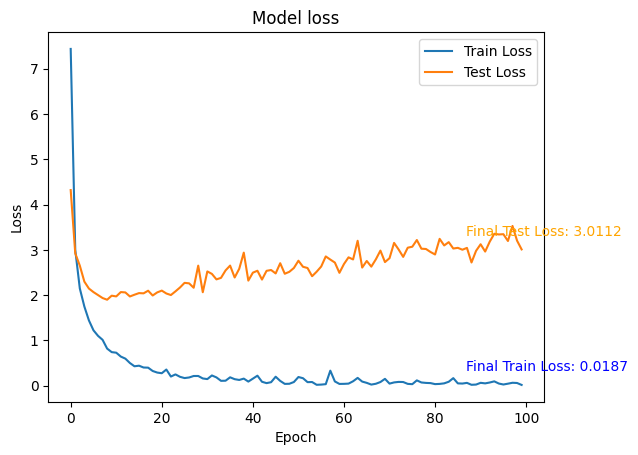

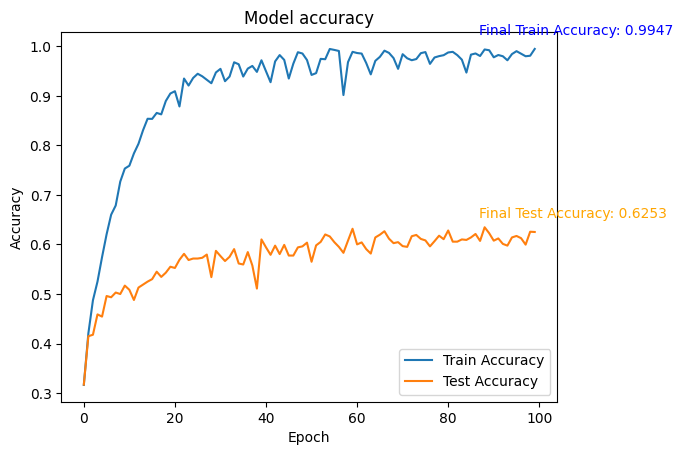

In [ ]:
plot_history(history)

**Analysis**


In the images above, we can see that although the model is very accurate on the training set data by the end of the epochs (0.9947 final accuracy), it only has a final accuracy of 0.6253 on the test set.

Our model is only as good as how it operates on unfamiliar data. Since there is a huge discrepancy between the test and training set accuracy, that is an indicator that overfitting may be happening with our machine learning model.

Another indication that our model is overfitting is that the loss in amongst the training set does not decrease very significantly towards the final epochs. This shows that the model is stagnating and not learning anything new.

Our model is overfitting to its training data, which is why it is very accurate when tested with the training data, but fails to some degree with unfamiliar data. We will aim to fix this.



## Fixing Overfitting

### Dropout
Strategy: Drop random neurons
each iteration of training. This increases the network robustness because by training on different neuron structures, the model will overfit in different ways. This means that the overall effect will be less overfitting as a whole [8].

The network cannot rely on specific neurons too much. All the neurons have to have greater responsibility towards the result.

It is similar to adding noise. More noise makes it more robust and less likely to overfit [8].

We will set a dropout probability to a certain value. Usually 0.1 to 0.5 is used.

### Regularization
A penalty is added to the error function. We want to punish large weights. This means that we are penalizing learning a more complex model in order to prevent overfitting.

- L1 Regularization
  - Minimizes absolute value of weights
  - Robust to outliers
  - Generates simple model
- L2 Regularization
  - Minimizes squared value of weights
  - Not robust to outliers
  - Learns complex patterns

Reference [11] Video 14.

We will use L2 Regularization because audio and music processing involve more complex patterns.

Let's run the model again but with Dropout and L2 Regularization implemented:

In [ ]:
# New Network Architecture
model_prevent_overfitting = keras.Sequential([

    # input layer - inputs.shape[1] is the interval, inputs.shape[2] is the mfcc
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

    # 1st hidden layer (512 neurons, ReLU) with Regularizer
    keras.layers.Dense(512, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3), #Dropout probability

    # 2nd hidden layer (256 neurons, ReLU) with Regularizer
    keras.layers.Dense(256, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3), # Dropout probability

    # 3rd hidden layer (64 neurons, ReLU) with Regularizer
    keras.layers.Dense(64, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3), # Dropout probability

    # output layer (10 neurons to organize into 10 categories)
    keras.layers.Dense(10, activation="softmax")
])

# Compiling the network
optimizer_prevent_overfitting = keras.optimizers.Adam(learning_rate = 0.0001)
model_prevent_overfitting.compile(optimizer=optimizer_prevent_overfitting,
                                  loss="sparse_categorical_crossentropy",
                                  metrics =["accuracy"])
model_prevent_overfitting.summary()

start = datetime.now()

# Training the network
history_prevent_overfitting = model_prevent_overfitting.fit(inputs_train,
                                                            targets_train,
          validation_data=(inputs_test, targets_test), # pass test data
          epochs=100,
          batch_size=32
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

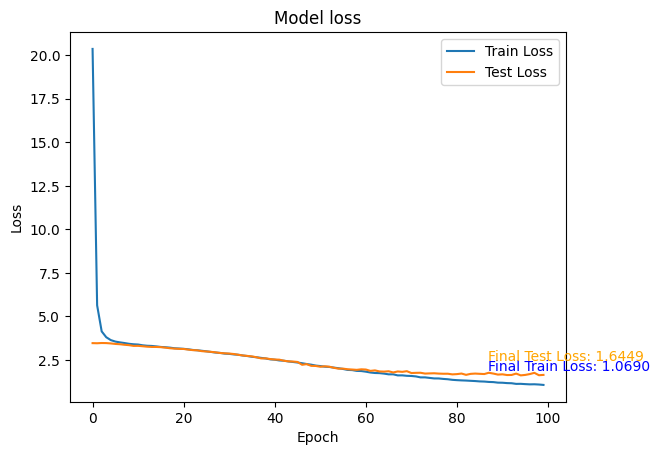

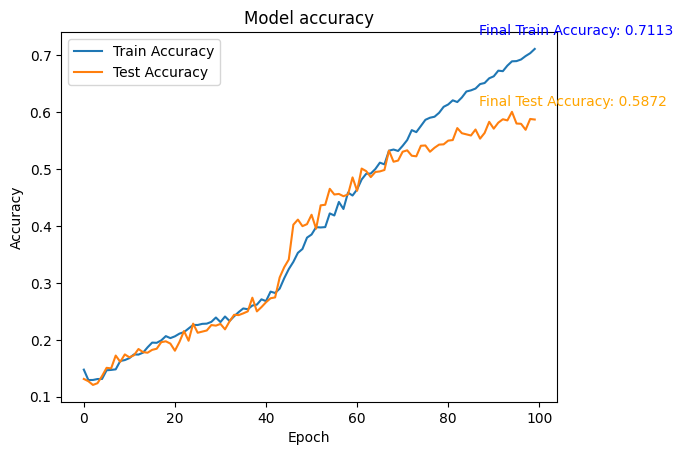

In [ ]:
plot_history(history_prevent_overfitting)

**Analysis**


Using the Dropout and Regularization techniques have visibly mitigated the overfitting issues.

Now, the test and training accuracies are closer together. The losses are also very close.

While the accuracy is slightly reduced from before (0.5872 compared to 0.6253), we have ensured that overfitting isn't happening as much. Another fact that corroborratess this is the training accuracy (0.7113) is significantly reduced from the previous value (0.9947), which is expected if our model is not overfitting to the training set.

# II. Implementing Convolutional Neural Network (CNN)

CNNs are mainly used for image processing and image feature extraction, and are said to perform better than a multi-layer perceptron neural network.

CNNs involve 2 major processes: **Convolution** and **Pooling**.

**A. Convolution**

Involves a kernel being applied to an image. A kernel is a grid of weights. The kernel is a smaller window size compared to the image, and it is shifted over the image to produce the output.

When weights are chosen carefully, kernels can be very effective feature detectors. In the context of machine learning and CNNs, these kernels (their weights) are *learned* by the model.

**B. Pooling**

The image is downsampled in order to maintain computational efficiency. The feature map's resolution is essentially reduced. This will reduce the model's dependency on where features are located, and will increase the computational speed [9].



## Data

We will use the MFCC data we stored previously for all the 10 genres in data_10.json.



### Creating train, validation, and test sets

We will use the training set for training, the validation set to evaluate model and make tweaks, and the test set for the final test.

The test set will be 25%, the validation set will be 20%, and the training set will be 55%

In [ ]:
from sklearn.model_selection import train_test_split

def prepare_datasets(test_size, validation_size):
  # Load data
  x, y = load_data(DATAPATH_JSON)

  # Create train/test split
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

  # Creat train/validation split
  x_train, x_validation, y_train, y_validation =
  train_test_split(x_train, y_train, test_size=validation_size)

  # Get 3D array from 2D data to input into CNN
  x_train = x_train[..., np.newaxis]
  x_validation = x_validation[..., np.newaxis]
  x_test = x_test[..., np.newaxis]

  return x_train, x_validation, x_test, y_train, y_validation, y_test

In [ ]:
# x refers to inputs, y refers to outputs
x_train, x_validation, x_test, y_train, y_validation, y_test =
prepare_datasets(0.25, 0.2) # 25% test set, 20% validation set

## CNN

### Building the CNN Architecture

We will have three convolutional layers. The first two will have kernels of dimension 3 x 3. The last will be of size 2 x 2.

The output layer will use softmax in order to classify the genre into one of our 10 classes.

In [ ]:
import tensorflow.keras as keras

def build_model(input_shape):
  # Create model
  model = keras.Sequential()

  # 1st convolutional layer
  model.add(keras.layers.Conv2D(32, (3, 3), # 32 kernel filters, 3 by 3 grid
                                activation='relu', # relu activation function
                                input_shape = input_shape))
  # Pooling layer
  model.add(keras.layers.MaxPool2D((3 ,3), strides=(2, 2), padding='same'))
  model.add(keras.layers.BatchNormalization()) # models converge faster with it

  # 2nd convolutional layer
  model.add(keras.layers.Conv2D(32, (3, 3), # 32 kernel filters, 3 by 3 grid
                                activation='relu', # relu activation function
                                input_shape = input_shape))
  # Pooling layer
  model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'))
  model.add(keras.layers.BatchNormalization()) # models converge faster with it

  # 3rd convolutional layer
  model.add(keras.layers.Conv2D(32, (2, 2), # 32 kernel filters, 2 by 2 grid
                                activation='relu', # relu activation function
                                input_shape = input_shape))
  # Pooling layer
  model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2), padding='same'))
  model.add(keras.layers.BatchNormalization()) # models converge faster with it

  # flatten output and feed into dense layer
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dropout(0.3)) # avoiding overfitting

  # output layer (softmax) in order to classify using probability distribution
  model.add(keras.layers.Dense(10, activation='softmax')) # 10 different classes

  return model

In [ ]:
# Building network
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
model_cnn = build_model(input_shape)

### Compiling the CNN

In [ ]:
# Compiling the network
optimizer_cnn = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimizer_cnn,
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 10, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 5, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 5, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 3, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 2, 32)         0         
 g2D)                                                            
                                                      

### Training the CNN

In [ ]:
from datetime import datetime

start = datetime.now()

# Train the CNN
history_cnn = model_cnn.fit(x_train, y_train,
                            validation_data=(x_validation, y_validation),
                            batch_size = 32, epochs = 100)

duration = datetime.now() - start

# Displaying stats
print("Training completed in time: ", duration)

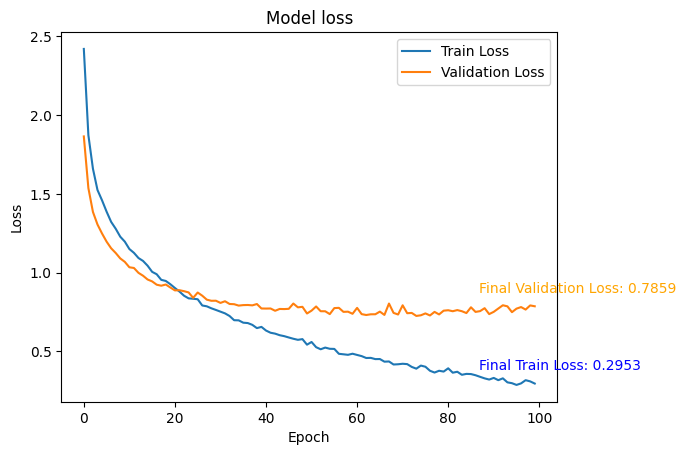

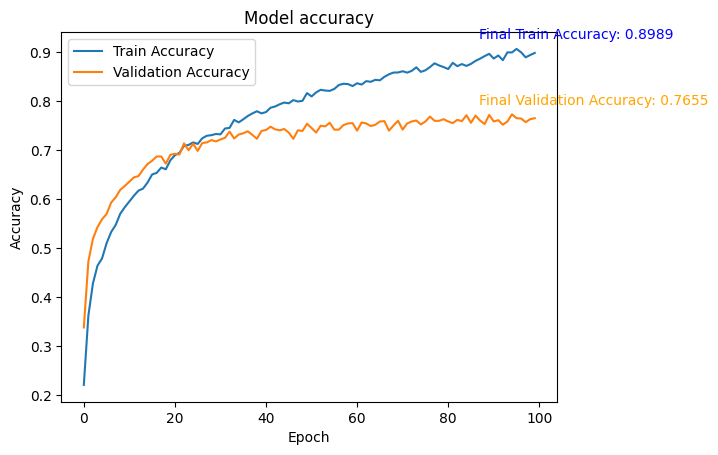

In [ ]:
# Plotting chart
plot_history(history_cnn)

**Analysis**


The validation accuracy is 0.7655! That beats the multi-layer perceptron accuracy by a long shot (0.5872).

I notice that some overfitting might be happening because the test accuracy and the training accuracy have a discrepancy. The model is overperforming on the training set because the model has become fine-tuned to work on the train set, but to not work as well on unfamiliar data.

The accuracies seem to be in-line with each other up until around epoch 36. I will train the model again, but not train it for longer than epoch 36. We can also notice that after epoch 36, the validation accuracy in orange stangates, so there really is no point of the extra epochs.

### Fine-Tuning

In [ ]:
# Stopping epochs earlier to prevent overfitting
model_cnn__v2 = build_model(input_shape)
optimizer_cnn__v2 = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn__v2.compile(optimizer=optimizer_cnn__v2,
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
history_cnn__v2 = model_cnn__v2.fit(x_train, y_train,
                                    validation_data=(x_validation, y_validation),
                                    batch_size = 32, epochs = 36)

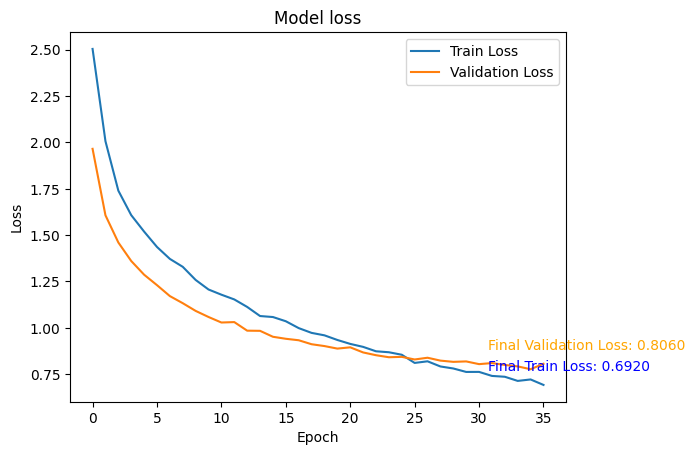

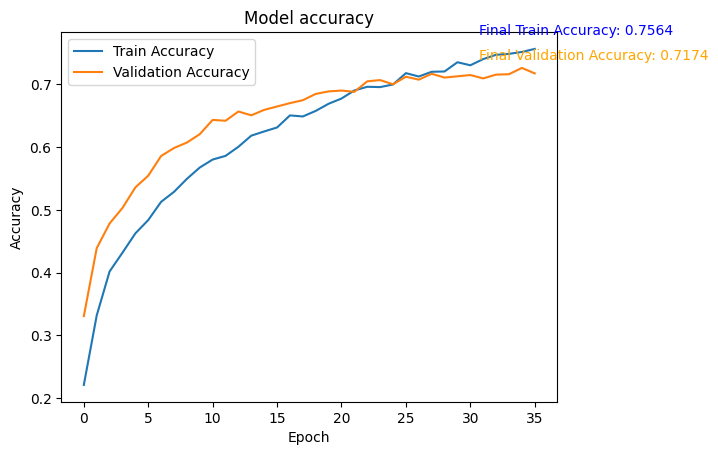

In [ ]:
# Plotting chart
plot_history(history_cnn__v2)

**Analysis**

This looks way better! With a validation set accuracy of 0.7174, we are still beating the multi-layer perceptron network, but we have also prevented overfitting.
- The train and validation accuracies are in-line with each other: we are not overfitting to the training set
- The loss is not stagnating, meaning we are always learning something significant and not overfitting.

## Evaluation

### Running on Test Set

In [ ]:
test_error, test_accuracy = model_cnn__v2.evaluate(x_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

78/78 [==============================] - 0s 5ms/step - loss: 0.8375 - accuracy: 0.7113
Accuracy on test set is: 0.7113071084022522


This is a great result. A 71.13% success rate on an unseen test set shows that the network is working, it is at a human classifcation level, and it is in-line with our training and validation accuracies, as expected. The CNN has surpassed the multi-layer neural network undeniably.

### Confusion Matrix

A confusion matrix is an effective way to show  how the model performed, and where its confidence lied when it comes to classifying certain groups.

It has "True labels" on the y-axis and "Predicted labels" on the x-axis. The values on each square indicate how many times the model classified a sample of a certain genre as a specific genre. The higher the number or the darker the cell on the matrix, the more times the model classified the genre on the y as the genre on the x.

Ideally, a confusion matrix should have the darkest squares in a diagonal, with the highes number being on the cells where the "True" and "Predicted" labels are the same.

We will generate a Confusion matrix for our CNN model below.


78/78 [==============================] - 1s 7ms/step


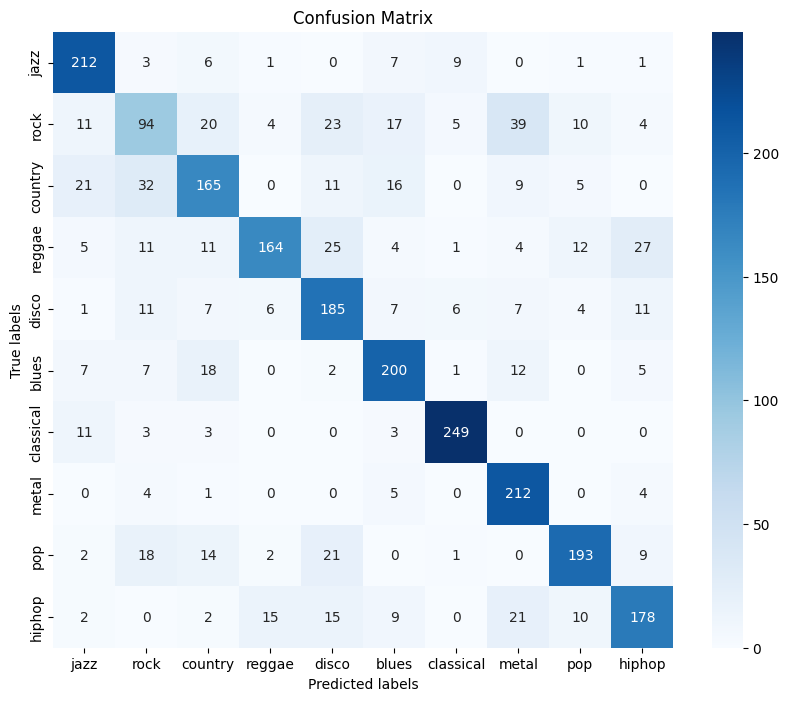

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define genre mapping
genre_mapping = [
    "jazz",
    "rock",
    "country",
    "reggae",
    "disco",
    "blues",
    "classical",
    "metal",
    "pop",
    "hiphop"
]

# Evaluate model on test set
y_pred = model_cnn.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix with reordered yticklabels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=genre_mapping, yticklabels=genre_mapping)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Insights from Confusion Matrix**

- Pretty strong visual results. We see a clear and dark diagonal. Our most predicted label is always the correct one.

- Rock was the genre my model had the most confusion with. While it still predicted correctly most of the time (94 confidence score), it was most often confused with metal (39 score). This makes sense to me. Rock and metal are very similar genres and I would have trouble myself distinguishing between the two. It's interesting that the model corroborates that. Rock and Metal share the electric guitar, electric bass, and drums as their major instruments.

- My model seems to be the most confident with classifying classical music. It has the highest confidence score, and gets confused the least when classifying samples of this genre. My hypothesis as to why is because classical music is markedly older than the other genres the model was tested on, and hence its audio features including the MFCCs would be significantly different from the other more modern genres, and therefore easier to identify.

- HipHop was most often confused with Metal, Disco, and Reggae. This was a really interesting insight. Given that HipHop originated in the Bronx in New York in predominantly African American neighbourhoods, it makes sense that Reggae had an influence over the genre, and the effect is understood by the model as well. "Old School Hip Hop" was actually referred to as "Disco Rap" because so many hiphop beats were being made after re-sampling and synthesizing old disco records [10]. It's interesting that the model is picking up on these influences. I would love to further explore where the Metal confusion is coming from, because that it not an obvious genre I would confuse HipHop with. HipHop has a long history of being one of the outlets of people that were from disenfranchised communities. Metal is a genre associated with aggression and violent catharsis. Maybe (and this is just me making a conjecture) their audio featues are similar because both can involve catharsis and releasing negative emotions. I would be interested in exploring this more.

# Conclusions

Learning how to employ neural networks to classify songs by music genre has been exciting. Out of the three major neural networks, I attempted two: Multi-layer Perceptron Neural Networks (MLPs), and Convolutional Neural Networks (CNNs) in order to classify by genre.

## Results
### MLP
My MLP Neural Network achieved a accuracy rate of 58.72% when we corrected for overfitting, and 62.53% when we did not. While this is below the rate an average human has for classifying genres (70%), it is still an interesting feat. It was right more than 50% of the time.

### CNN
My CNN achieved an accuracy rate of 71.74% when we corrected for overfitting, and 76.55% when we did not. I am really impressed with this. It has beaten the MLP, and is around and potentially even better the accuracy rate of a human (70%). I consider this a huge win.

I suspect the CNN beat the MLP because CNNs take in 2D images as input, while the spatial data is flattened with the MLP. Maybe by retaining that spatial information of the MFCCs, the CNN is more successful at identifying key audio features related to genre.

## What I learned

- How overfitting can be corrected using Dropout, Regularization, and stopping at an earlier epoch
- How genres like HipHop and Metal can be similar to other genres, and have that be represented in the confusuion matrix.



## Next Steps
- I would like to use more features in addition to MFCCs in the neural networks. Examples are Mel-spectrograms, Constant Q Chromas, and Tempograms.
- For comparison purposes, I think it would be interesting to try other classifiers like Recurrent Neural Networks (RNNs) and Support Vector Machines (SVMs).

# References
[1] Tzanetakis, G., & Cook, P. (2002). Musical genre classification of audio signals. IEEE Transactions on speech and audio processing, 10(5), 293-302. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=1021072

[2] Dong, M. (2018). Convolutional neural network achieves human-level accuracy in music genre classification. arXiv preprint arXiv:1802.09697. https://arxiv.org/abs/1802.09697

[3] Xu, C., Maddage, N. C., Shao, X., Cao, F., & Tian, Q. (2003, April). Musical genre classification using support vector machines. In 2003 IEEE International Conference on Acoustics, Speech, and Signal Processing, 2003. Proceedings.(ICASSP'03). (Vol. 5, pp. V-429). IEEE. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=1199998

[4] Panagakis, Y., Kotropoulos, C., & Arce, G. R. (2009, August). Music genre classification via sparse representations of auditory temporal modulations. In 2009 17th European Signal Processing Conference (pp. 1-5). IEEE. https://ieeexplore.ieee.org/abstract/document/7077429

[5] Ndou, N., Ajoodha, R., & Jadhav, A. (2021, April). Music genre classification: A review of deep-learning and traditional machine-learning approaches. In 2021 IEEE International IOT, Electronics and Mechatronics Conference (IEMTRONICS) (pp. 1-6). IEEE. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9422487

[6] Zhang, W., Lei, W., Xu, X., & Xing, X. (2016, September). Improved music genre classification with convolutional neural networks. In Interspeech (pp. 3304-3308). https://www.isca-archive.org/interspeech_2016/zhang16h_interspeech.pdf

[7] Huang, D. A., Serafini, A. A., & Pugh, E. J. (2018). Music Genre Classification. https://cs229.stanford.edu/proj2018/report/21.pdf

[8] Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: a simple way to prevent neural networks from overfitting. The journal of machine learning research, 15(1), 1929-1958.

[9] Kaggle. (n.d.). What is pooling in Deep Learning?. Kaggle. https://www.kaggle.com/discussions/questions-and-answers/59502

[10] History of hip hop music. EnglishClub. (n.d.). https://www.englishclub.com/vocabulary/music-hip-hop.php

[11] Velardo, V. (2020). Deep Learning (for Audio) with Python. The Sound of AI. Youtube. https://www.youtube.com/playlist?list=PL-wATfeyAMNrtbkCNsLcpoAyBBRJZVlnf
